# <center> A Complete Guide to Linear Regression </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

## Table of Contents

<a id="toc"></a>

- [1. Quick Introduction](#1)
    - 1.1 What is Linear Regression?
    - 1.2 When to use Linear Regression?
        
        
- [2. How does Linear Regression learn from data?](#2)
    - 2.1 The Best-fit Line
    - 2.2 Least Square Error Method
    - 2.3 How well does the model fit the data?
   

- [3. What are the assumptions that Linear Regression made?](#3)
    - 3.1 Linearity
    - 3.2 Normality
    - 3.3 Homoscedasticity
    - 3.4 Little or No Multicollinearity


- [4. Example: House Price Prediction](#4)

<a id="1"></a>

# <center>Quick Introduction</center>

## What is Linear Regression?

`Linear Regression` is a method to predict dependent varaible (Y) based on values of independent varaibles (X) by modelling the relationship between them as a **straight line**.


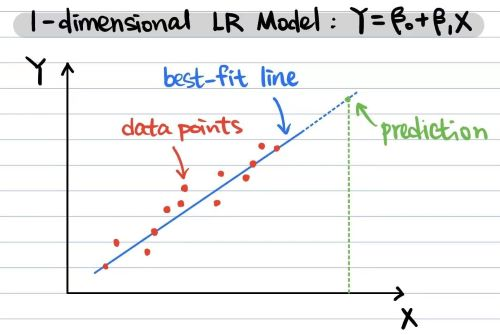

The diagram above demonstrates a `1-dimensional linear regression model`: by fitting a straight line through the data points, we can **make predictions of Y at any values of X**.

## When to use Linear Regression?

Linear Regression can be used when the **target variable is numerical and continuous**. 

For example, we can use linear regression to **predict the price of a house** (Y) based on its attributes (X) like size, location, style and etc.

Linear Regression considers all the **`inputs`** as **numerical varaibles**. Therefore, we need to encode all the categorical variables to make them numerical before training the model.

<a href="#toc" role="button" aria-pressed="true" > Back to Table of Contents </a>

<a id="2"></a>

# <center>How does Linear Regression learn from data?</center>

## The Best-fit Line

We know that Linear Regression fits a straight line through the data points, but **how does it find the `best line`** that will give the most accurate predictions?

Linear Regression assumes the output (Y) and inputs (X) follows a linear relationship, however, it is **unlikely that real-world data will fall perfectly onto a single straight line**. Therefore, **`errors`** exist when we use a straight line to model the relationship between Y and X. 

To find the **`best-fit line`**, we aim to **minimise the errors**. There are a few ways to **measure the errors**:

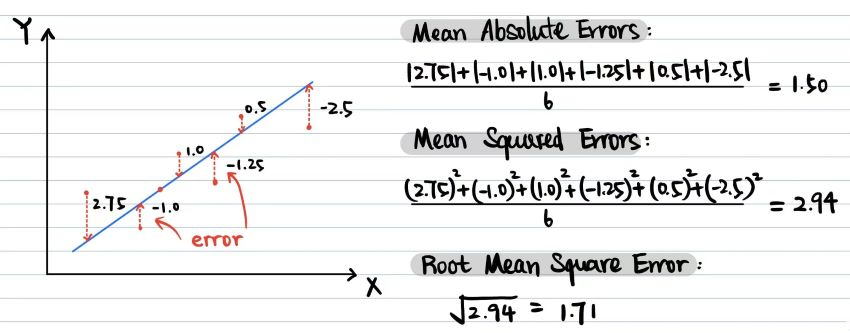

## Least Square Estimation

The most commonly used approach for estimating the best-fit line is called the **`Least Square Estimation`**, which is to find the **model parameters** that minimise the **Mean Square Error (MSE)**.

Let's consider a **1-dimensional Linear Regression model** as an example:

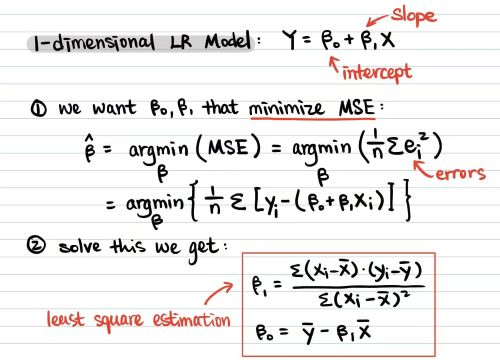

Similar approach can be used to compute the parameters when there are **multiple input variables**: 

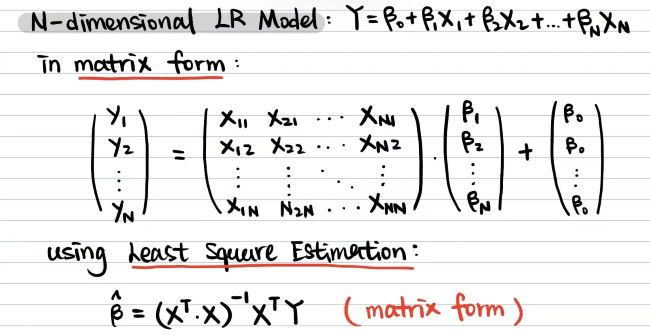

## How well does the model fit the data?

After computing the parameters, we want to know how well does the best-fit line do in modelling the relationship between Y and X. 

**`Coefficient of Determination`** is a commonly used evaluation metric, it is also called the **R-Squared**. 

R-Squared represents how much of the variations in Y in explained by X in a Linear Regression model. **Larger the R-Squared, better the regression model**.

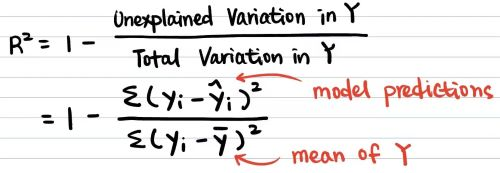

<a href="#toc" role="button" aria-pressed="true" > Back to Table of Contents </a>


<a id="3"></a>

# <center>What are the assumptions that Linear Regression made?</center>

## Linearity

Obviously, Linear Regression assumes that there exists a **linear relationship** between Y and X.

This assumption can be verify by plotting a **scatter plot**.

## Normality

This assumption states that the **residuals** (differences between the actual Y values and the predicted Y values) of a Linear Regression model are **normally distributed**. 

This assumption can be checked by generating a **Q-Q-Plot**:

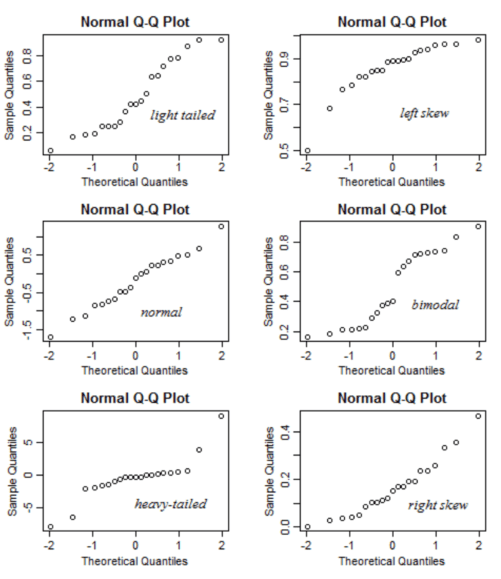

## Homoscedasticity

**Homoscedasticity** means that the variation of the dependent varaible (Y) remains constant across the independent varaible (X) values.

We can check homoscedasticity by plotting a scatter plot with the **model prediction on the x-axis** and the **residuals on the y-axis**. We are expecting to see a **horizontal straight line** on the plot to prove homoscedasticity.

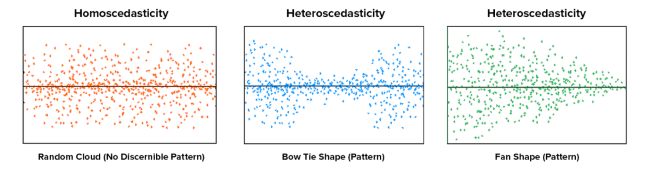

## Little/No Multicollinearity

When there are **multiple input varaibles**, we have to make sure that **multicollinearity does not exist** or at least there is little multicollinearity.

**Multicollinearity** describes the correlation between the input varaibles. No multicollinearity means that the input varaibles are **independent** to each other.

We can check this assumption by creating **pair plots** and we expect to see **no relationships** between input varaibles.

<a href="#toc" role="button" aria-pressed="true" > Back to Table of Contents </a>

<a id="4"></a>

# <center>Example: House Price Prediction</center>

Thanks to the great Notebook: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

### Import Data

In [4]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/house-prices-advanced-regression-techniques/train.csv'

### Target Variable

In [ ]:
#Q-Q Plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

As shown in the Q-Q plot, we can see the target variable is right skewed. Therefore, we need to transform it to become normally distributed.

In [ ]:
#log-transform the target variable
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### Data Preparation

In [ ]:
y_train= df_train['SalePrice']

df = pd.concat((df_train, df_test)).reset_index(drop=True)
df = df.drop(['Id','SalePrice'], axis=1)

In [ ]:
#impute missing values
df_1 = df.copy()
for feature in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",'GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"MasVnrType",'MSSubClass']:
    df_1[feature] = df_1[feature].fillna("None")

df_2 = df_1.copy()
for feature in ['GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',"MasVnrArea"]:
    df_2[feature] = df_2[feature].fillna(0)

df_3 = df_2.copy()
for feature in ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType']:
    df_3[feature] = df_3[feature].fillna(df_3[feature].mode()[0])

df_4 = df_3.copy()
df_4["Functional"] = df_4["Functional"].fillna("Typ")

df_5 = df_4.copy()
df_5 = df_5.drop(['Utilities'], axis=1)

df_6 = df_5.copy()
df_6["LotFrontage"] = df_6.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
#encode categorical variables
df_7 = df_6.copy()
df_7 = pd.get_dummies(df_7)

In [ ]:
#standardize numerical varaibles
from sklearn.preprocessing import StandardScaler

df_8 = df_7.copy()
numerical_features = df_8.dtypes[df_8.dtypes != "object"].index

scaler = StandardScaler()
df_8[numerical_features] = scaler.fit_transform(df_8[numerical_features])

In [ ]:
#split the dataset back to train and test sets
df_train = df_8[:df_train.shape[0]]
df_test = df_8[df_train.shape[0]:]

### Linear Regression Modelling

In [ ]:
#build and train a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_train, y_train)
plt.scatter(lr.predict(df_train), y_train)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [ ]:
y_pred = lr.predict(df_test)
y_pred